In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import PlayersVelocityChart as to_chart

In [2]:
DATADIR = 'C:/FcPythonDashboard/data_/tracking data/'

game_id = 2  # let's look at sample match 2

# read in the event data
events = mio.read_event_data(DATADIR, game_id)

# read in tracking data
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home, tracking_away, events = mio.to_single_playing_direction(tracking_home, tracking_away, events)

# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home, smoothing=True)
tracking_away = mvel.calc_player_velocities(tracking_away, smoothing=True)

#calc valocity in sprint
home_players_df  = to_chart.calc_players_velocity_in_sprints(tracking_home,'Home')
away_players_df  = to_chart.calc_players_velocity_in_sprints(tracking_away,'Away')
    

Reading team: home
Reading team: away


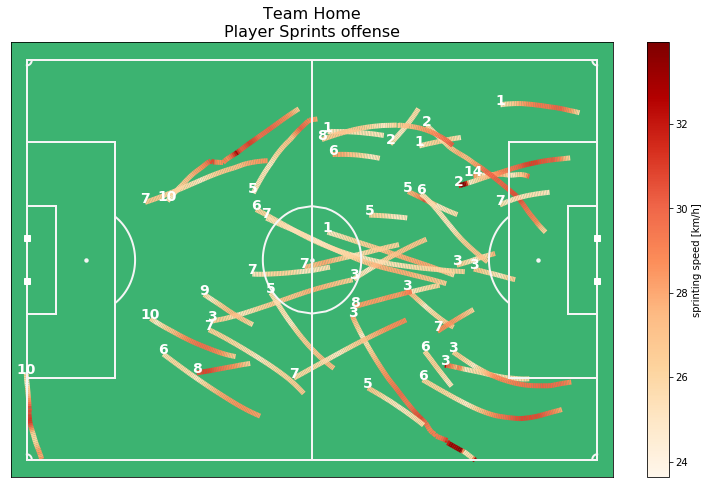

In [3]:
#Team home away
fig, ax = mviz.plot_pitch()
to_chart.speed_sprint_chart(home_players_df, tracking_home, ax, fig, 'offense', 'Home')

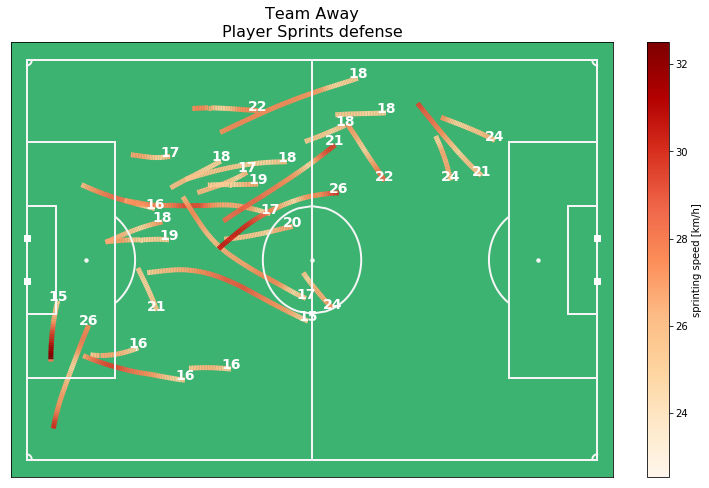

In [4]:
#Team Away
fig2, ax2 = mviz.plot_pitch()
to_chart.speed_sprint_chart(away_players_df, tracking_away, ax2, fig2, 'defense', 'Away')

